In [1]:
from scipy.sparse import csr_matrix
import implicit
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
root = '../data/parquets/'
book = pd.read_parquet(root + '/book_views.csv.parquet.gz', engine='pyarrow')

In [3]:
book

,user_id,item_id,rate,timestamp
0,4,234705,0.0,1.363316e+09
1,116482,234705,0.0,1.363334e+09
2,112934,234170,10.0,1.363334e+09
3,112934,95396,10.0,1.363336e+09
4,35936,205566,0.0,1.363347e+09
...,...,...,...,...
1097012,2045727,230231,NaN,1.632047e+09
1097013,2045727,94061,NaN,1.632047e+09
1097014,2045727,245080,NaN,1.632048e+09
1097015,854238,228254,NaN,1.632050e+09


In [4]:
users = book.drop_duplicates(subset = 'user_id').user_id.to_list()

In [5]:
reversed_book = book.iloc[::-1]

In [6]:
def get_test_subset(reversed_views):
    test_df = pd.DataFrame()
    for user in tqdm(users):
        user_data = reversed_views[reversed_views.user_id == user]
        if user_data.count()[0]>3:
            for i in range(3):
                test_df = test_df.append(user_data.iloc[i])
        else:
            test_df = test_df.append(user_data)
    return test_df

In [7]:
book_test = get_test_subset(reversed_book)

  0%|          | 0/84525 [00:00<?, ?it/s]

In [8]:
book_train = pd.concat([book, book_test]).drop_duplicates(keep=False)

In [9]:
book_test.head()

,item_id,rate,timestamp,user_id
1067669,246366.0,NaN,1.621501e+09,4.0
1065193,48928.0,NaN,1.620711e+09,4.0
1029569,110157.0,NaN,1.609244e+09,4.0
5434,92949.0,0.0,1.368568e+09,116482.0
1,234705.0,0.0,1.363334e+09,116482.0


In [10]:
book_train.head()

,user_id,item_id,rate,timestamp
0,4.0,234705.0,0.0,1.363316e+09
2,112934.0,234170.0,10.0,1.363334e+09
3,112934.0,95396.0,10.0,1.363336e+09
4,35936.0,205566.0,0.0,1.363347e+09
5,35936.0,227052.0,0.0,1.363348e+09


# Look through data

## Book

In [21]:
import matplotlib.pyplot as plt

In [49]:
len(book.groupby('item_id').count().user_id.to_list())

63023

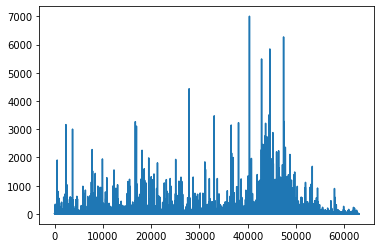

In [47]:
plt.plot(book.groupby('item_id').count().user_id.to_list()) # users per item

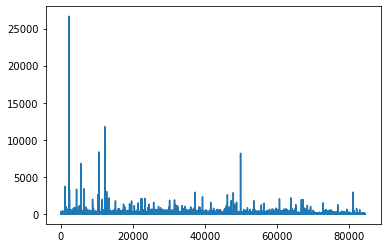

In [52]:
plt.plot(book.groupby('user_id').count().item_id.to_list()) # items per user

In [11]:
print('median:', book.groupby('user_id').count().reset_index().rate.median()) 
print('mean:', book.groupby('user_id').count().reset_index().rate.mean().round()) # среднее кол-во оценок выставленных пользователем
print('max:', book.groupby('user_id').count().reset_index().rate.max())

median: 2.0
mean: 12.0
max: 26651


<AxesSubplot:>

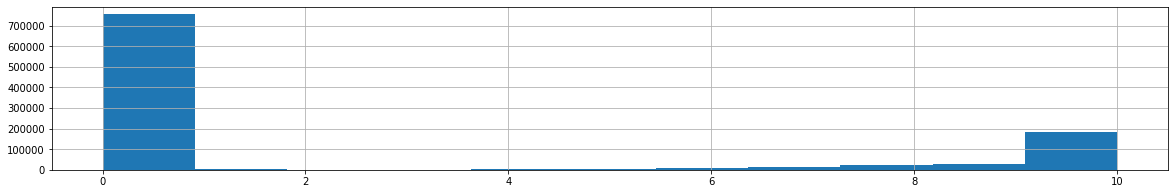

In [12]:
book.rate.hist(bins=11, figsize=(20, 3)) 

<AxesSubplot:>

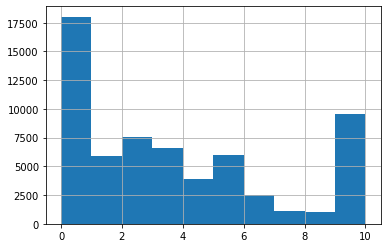

In [13]:
book.groupby('item_id').mean().rate.hist() # распределение по оценкам для айтемов

In [14]:
print('median:', book.groupby('item_id').count().reset_index().rate.median()) #кол-во оценок
print('mean:', book.groupby('item_id').count().reset_index().rate.mean().round())
print('max:', book.groupby('item_id').count().reset_index().rate.max())

median: 3.0
mean: 16.0
max: 6804


## Time distributions

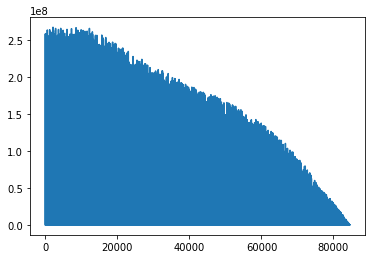

In [74]:
plt.plot((book.groupby('user_id').timestamp.max() - book.groupby('user_id').timestamp.min()).to_list()) 
# most of the users continue visiting the site

In [86]:
time_df = book.groupby('timestamp').count().rate.reset_index().sort_values(by='timestamp')

In [128]:
time =  time_df.timestamp.to_list()

In [110]:
total_rates = []
for row in tqdm(time_df.iterrows(), total = time_df.shape[0]):
    if total_rates:
        total_rates.append(total_rates[-1]+row[1].rate)
    else:
        total_rates.append(row[1].rate)

  0%|          | 0/1084550 [00:00<?, ?it/s]

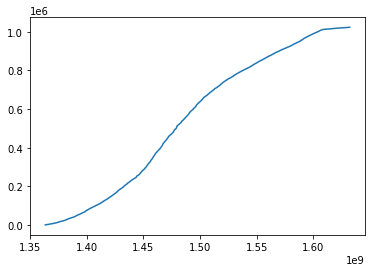

In [131]:
plt.plot(time, total_rates) # site activity

## Manga

In [3]:
manga = pd.read_parquet(root + '/manga_1_views.csv.parquet.gz', engine='pyarrow')

In [4]:
manga.head()

,user_id,item_id,rate,timestamp
0,17934,2718,NaN,1.339927e+09
1,18313,2718,10.0,1.339927e+09
2,43620,2718,5.0,1.339927e+09
3,63405,2718,10.0,1.339927e+09
4,65907,2718,NaN,1.339927e+09


In [5]:
print('median:', manga.groupby('user_id').count().reset_index().rate.median()) 
print('mean:', manga.groupby('user_id').count().reset_index().rate.mean().round()) # среднее кол-во оценок выставленных пользователем
print('max:', manga.groupby('user_id').count().reset_index().rate.max())

median: 10.0
mean: 66.0
max: 13002


<AxesSubplot:>

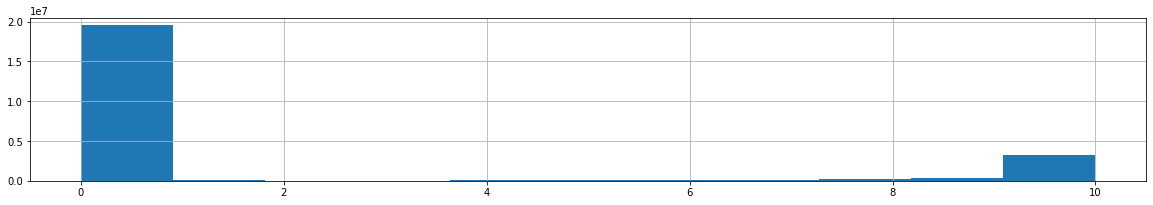

In [6]:
manga.rate.hist(bins=11, figsize=(20, 3)) 

<AxesSubplot:>

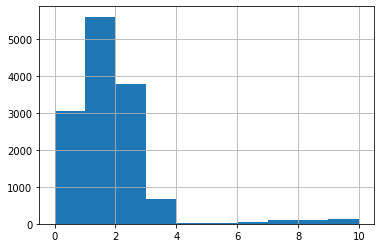

In [7]:
manga.groupby('item_id').mean().rate.hist()

In [8]:
print('median:', manga.groupby('item_id').count().reset_index().rate.median()) #кол-во оценок
print('mean:', manga.groupby('item_id').count().reset_index().rate.mean().round())
print('max:', manga.groupby('item_id').count().reset_index().rate.max())

median: 627.0
mean: 1749.0
max: 64174
